## Logistic Regression

In [1]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

### Find the best parameter in LR model

In [87]:
# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs']}
]

# Create a base model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Perform Cross Validation

In [6]:
# Define the model
clf_cv = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None, multi_class='auto')
# clf_cv = LogisticRegression()

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10)

# Evaluate the model using cross-validation
# demo_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","response_time"]
# X = X[demo_cols]
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [7]:
# Print scores
print('MACRO:')
print('Precision: %.4f (%.4f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.4f (%.4f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.4f (%.4f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print()
print('MICRO:')
print('Precision: %.4f (%.4f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.4f (%.4f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.4f (%.4f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

MACRO:
Precision: 0.9835 (0.0183)
Recall: 0.9726 (0.0330)
F1 score: 0.9773 (0.0216)

MICRO:
Precision: 0.9912 (0.0091)
Recall: 0.9912 (0.0091)
F1 score: 0.9912 (0.0091)


### Feature Weight

In [2]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean weights: [0.00000000e+00 2.15095957e+01 1.69203005e-03 1.65577683e-03
 8.66480556e-01 2.29621094e-03]
Normalized weights: [0.00000000e+00 9.61034069e-01 7.55987491e-05 7.39789796e-05
 3.87137604e-02 1.02593139e-04]


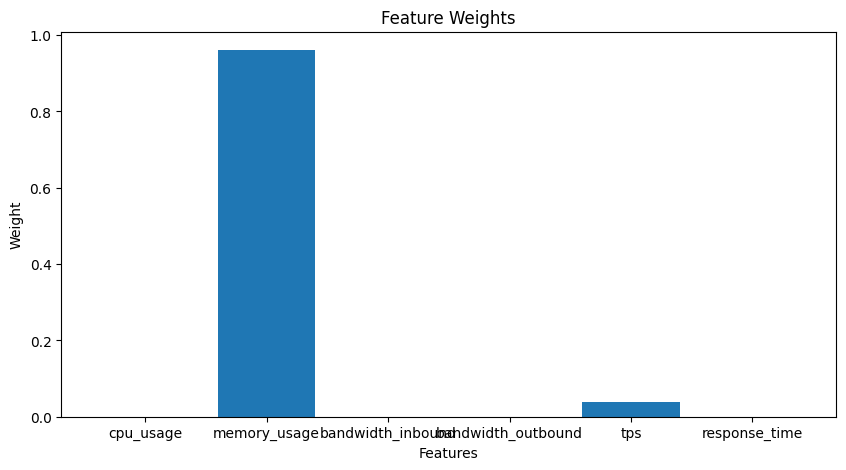

In [6]:
# Create a logistic regression classifier and fit it to the training data
clf = LogisticRegression()
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None, multi_class='auto')

clf.fit(X_train, y_train)

# Get the feature weights
weights = clf.coef_

# Compute the mean weights (this makes sense in multi-class problems)
mean_weights = np.mean(np.abs(weights), axis=0)

print(f"Mean weights: {mean_weights}")

# Normalize the mean weights
normalized_weights = mean_weights / np.sum(mean_weights)

print(f"Normalized weights: {normalized_weights}")

# Plot the normalized weights
plt.figure(figsize=(10, 5))
plt.bar(feature_cols, normalized_weights)
plt.title('Feature Weights')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.show()

### Feature Importance

In [105]:
# train a logistic regression model
clf_feature_imp = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
# X = X[['cpu_usage', 'memory_usage']]
clf_feature_imp.fit(X, y)

# The coefficients (parameters of the logistic function) give us the feature importance
feature_importance = clf_feature_imp.coef_[0]

# normalize feature importance
feature_importance = 100.0 * (feature_importance / max(feature_importance))

# let's print the feature importance
for i in range(len(feature_importance)):
    print(f"Feature {i+1}: {feature_importance[i]}")

coef [ 0.00000000e+00 -2.22338887e+01 -1.52954534e-03  1.51677956e-03
  1.07527975e+00  2.09031038e-03]
feature_importance [ 0.00000000e+00 -2.06773063e+03 -1.42246271e-01  1.41059065e-01
  1.00000000e+02  1.94396889e-01]
Feature 1: 0.0
Feature 2: -2067.7306307413214
Feature 3: -0.142246270811075
Feature 4: 0.1410590653349358
Feature 5: 100.0
Feature 6: 0.194396889211519


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train the model

In [106]:
# Create and train the model
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, fit_intercept=False, penalty='l1', solver='liblinear')

In [107]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [108]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9861431870669746
Precision: 0.9285714285714286
Recall: 0.8666666666666667
F1: 0.896551724137931


### Visualize the model

In [109]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[401,   2],
       [  4,  26]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

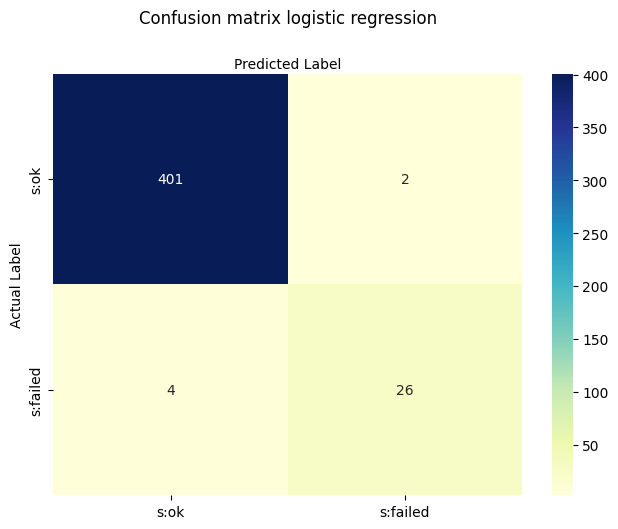

In [110]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix logistic regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [111]:
pickle.dump(clf, open("./models/logistic_regression.p", "wb"))